### Module 20 Challenge Week 2: Create 3 Visualizations from Data

In [6]:
# Dependencies
import numpy as np
import pandas as pd
from pathlib import Path

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# add Matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
# create engine to clean data
#engine = create_engine("sqlite:///xxx.xxx")

# In the meantime load csv file
file_path = Path('Data/population_pct_within_qrt_mile_alcohol.csv')
df = pd.read_csv(file_path)
df.head()

,Indicator_ID,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips_id,region_name,region_code,license_type,num_people_qrt,tot_people,pct_of_total
0,774,Percent of Population within 1/4 Mile of Alcoh...,2014,8,Other,CT,6001442100,4421,Alameda,6001,NaN,NaN,Total_licenses,0.0,0.0,NaN
1,774,Percent of Population within 1/4 Mile of Alcoh...,2014,1,AIAN,CD,600190020,Alameda,Alameda,6001,Bay Area,1.0,Total_licenses,159.0,247.0,64.37
2,774,Percent of Population within 1/4 Mile of Alcoh...,2014,3,AfricanAm,CD,600190020,Alameda,Alameda,6001,Bay Area,1.0,Total_licenses,2674.0,4516.0,59.21
3,774,Percent of Population within 1/4 Mile of Alcoh...,2014,2,Asian,CD,600190020,Alameda,Alameda,6001,Bay Area,1.0,Total_licenses,14243.0,22822.0,62.41
4,774,Percent of Population within 1/4 Mile of Alcoh...,2014,4,Latino,CD,600190020,Alameda,Alameda,6001,Bay Area,1.0,Total_licenses,5689.0,8092.0,70.30


### Population within 1/4 mile of liquor Racial/Ethnic Break down by State

In [9]:
df_1 = df[['race_eth_code', 'race_eth_name', 'geotype', 'geoname', 'region_name','num_people_qrt', 'tot_people', 'pct_of_total']]
df_1.dtypes

race_eth_code       int64
race_eth_name      object
geotype            object
geoname            object
region_name        object
num_people_qrt    float64
tot_people        float64
pct_of_total      float64
dtype: object

In [10]:
# Rebucket Races/ethnicities 
df_1['race_eth_updt'] = df_1['race_eth_name']
df_1.loc[(df_1['race_eth_name'] == 'AIAN') | (df_1['race_eth_name'] == 'NHOPI'), 'race_eth_updt'] = 'Other'  

df_1

/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
0,8,Other,CT,4421,NaN,0.0,0.0,NaN,Other
1,1,AIAN,CD,Alameda,Bay Area,159.0,247.0,64.37,Other
2,3,AfricanAm,CD,Alameda,Bay Area,2674.0,4516.0,59.21,AfricanAm
3,2,Asian,CD,Alameda,Bay Area,14243.0,22822.0,62.41,Asian
4,4,Latino,CD,Alameda,Bay Area,5689.0,8092.0,70.30,Latino
...,...,...,...,...,...,...,...,...,...
90445,7,Multiple,RE,Southern California,Southern California,181987.0,378200.0,48.12,Multiple
90446,5,NHOPI,RE,Southern California,Southern California,25455.0,43955.0,57.91,Other
90447,8,Other,RE,Southern California,Southern California,22985.0,40257.0,57.10,Other
90448,9,Total,RE,Southern California,Southern California,9744365.0,18051534.0,53.98,Total


In [19]:
# Racial/Ethnic Breakdown by State: CA
df_state = df_1[df_1.geotype == 'CA']
df_state = df_state[df_state.race_eth_code != 9]
df_state

,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90315,1,AIAN,CA,California,NaN,64394.0,162250.0,39.69,Other
90316,3,AfricanAm,CA,California,NaN,1197915.0,2163804.0,55.36,AfricanAm
90317,2,Asian,CA,California,NaN,2410073.0,4775070.0,50.47,Asian
90318,4,Latino,CA,California,NaN,8100882.0,14013719.0,57.81,Latino
90319,7,Multiple,CA,California,NaN,439097.0,968696.0,45.33,Multiple
90320,5,NHOPI,CA,California,NaN,65140.0,128577.0,50.66,Other
90321,8,Other,CA,California,NaN,42855.0,85587.0,50.07,Other
90323,6,White,CA,California,NaN,5917756.0,14956253.0,39.57,White


In [237]:
## summarize by race_eth_updt to group small populations
grouped_multiple = df_state.groupby(['geotype','race_eth_updt']).agg({'num_people_qrt': ['sum']})
grouped_multiple.columns = ['people_qtr_sum']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,geotype,race_eth_updt,people_qtr_sum
0,CA,AfricanAm,1197915.0
1,CA,Asian,2410073.0
2,CA,Latino,8100882.0
3,CA,Multiple,439097.0
4,CA,Other,172389.0
5,CA,White,5917756.0


In [238]:
# Pull out the totals and merge with rest of file
df_state_tot = df_1[df_1.race_eth_code == 9]
df_state_tot = df_state_tot[df_state_tot.geotype == 'CA']
df_state_tot = df_state_tot[['geotype', 'num_people_qrt']] 
df_state_tot.rename(columns={df_state_tot.columns[1]:'tot_people'}, inplace=True)
df_state_tot

,geotype,tot_people
90322,CA,18238112.0


In [243]:
# Pick up total population to recaluclate % of total
df_state_pct = pd.merge(df_state_tot,
                 grouped_multiple[['geotype','race_eth_updt', 'people_qtr_sum']],
                 on='geotype')
df_state_pct


,geotype,tot_people,race_eth_updt,people_qtr_sum
0,CA,18238112.0,AfricanAm,1197915.0
1,CA,18238112.0,Asian,2410073.0
2,CA,18238112.0,Latino,8100882.0
3,CA,18238112.0,Multiple,439097.0
4,CA,18238112.0,Other,172389.0
5,CA,18238112.0,White,5917756.0


In [244]:
# Calculate new pct_total
df_state_pct['pct_total'] = df_state_pct['people_qtr_sum'] / df_state_pct['tot_people']
df_state_pct

,geotype,tot_people,race_eth_updt,people_qtr_sum,pct_total
0,CA,18238112.0,AfricanAm,1197915.0,0.065682
1,CA,18238112.0,Asian,2410073.0,0.132145
2,CA,18238112.0,Latino,8100882.0,0.444173
3,CA,18238112.0,Multiple,439097.0,0.024076
4,CA,18238112.0,Other,172389.0,0.009452
5,CA,18238112.0,White,5917756.0,0.324472


In [245]:
df_state_pct = df_state_pct[['race_eth_updt', 'pct_total']] 
df_state_pct.set_index('race_eth_updt', inplace=True)
df_state_pct

,pct_total
race_eth_updt,
AfricanAm,0.065682
Asian,0.132145
Latino,0.444173
Multiple,0.024076
Other,0.009452
White,0.324472


In [246]:
df_trans = df_state_pct.transpose()
df_trans

race_eth_updt,AfricanAm,Asian,Latino,Multiple,Other,White
pct_total,0.065682,0.132145,0.444173,0.024076,0.009452,0.324472


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


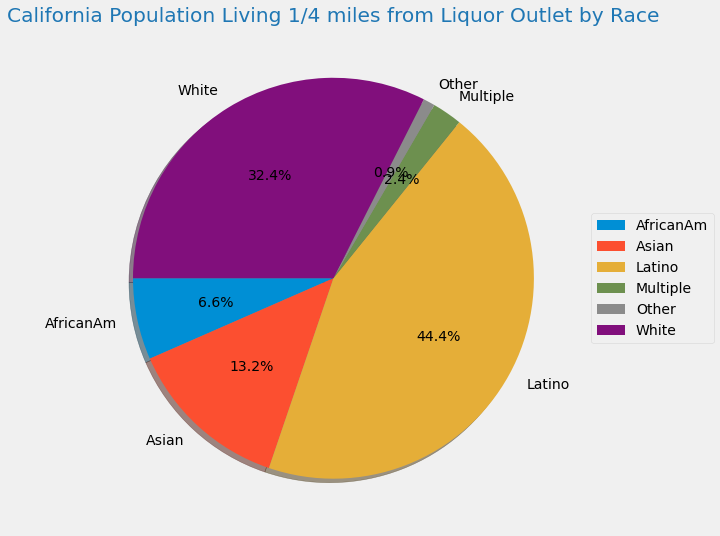

In [255]:
# Plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 16))
plt.pie(df_trans,
            labels=["AfricanAm", "Asian", "Latino", "Multiple", "Other", "White"],
            autopct='%1.1f%%', pctdistance= 0.6,
            shadow=True, startangle=180)
plt.title('California Population Living 1/4 miles from Liquor Outlet by Race', color = "Tab:blue")
#plt.legend(loc = 'best')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('Resources/dec_wtype.png')
plt.show()

#print(dec_wtype)

### Population within 1/4 mile of liquor Racial/Ethnic Break down by County

In [58]:
#Pull our only county level information
df_county = df_1[df_1.geotype == 'RE']
df_county = df_county[df_county.race_eth_code != 9]
df_county

,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90324,1,AIAN,RE,Bay Area,Bay Area,11644.0,20691.0,56.28,Other
90325,3,AfricanAm,RE,Bay Area,Bay Area,290643.0,460178.0,63.16,AfricanAm
90326,2,Asian,RE,Bay Area,Bay Area,901884.0,1645872.0,54.80,Asian
90327,4,Latino,RE,Bay Area,Bay Area,1035942.0,1681800.0,61.60,Latino
90328,7,Multiple,RE,Bay Area,Bay Area,129138.0,248268.0,52.02,Multiple
...,...,...,...,...,...,...,...,...,...
90444,4,Latino,RE,Southern California,Southern California,5082016.0,8169102.0,62.21,Latino
90445,7,Multiple,RE,Southern California,Southern California,181987.0,378200.0,48.12,Multiple
90446,5,NHOPI,RE,Southern California,Southern California,25455.0,43955.0,57.91,Other
90447,8,Other,RE,Southern California,Southern California,22985.0,40257.0,57.10,Other


In [262]:
## summarize by race_eth_updt to group small populations
grouped_multiple2 = df_county.groupby(['region_name','race_eth_updt']).agg({'num_people_qrt': ['sum']})
grouped_multiple2.columns = ['people_qtr_sum']
grouped_multiple2 = grouped_multiple2.reset_index()
grouped_multiple2

,region_name,race_eth_updt,people_qtr_sum
0,Bay Area,AfricanAm,290643.0
1,Bay Area,Asian,901884.0
2,Bay Area,Latino,1035942.0
3,Bay Area,Multiple,129138.0
4,Bay Area,Other,45946.0
...,...,...,...
79,Southern California,Asian,1176999.0
80,Southern California,Latino,5082016.0
81,Southern California,Multiple,181987.0
82,Southern California,Other,70773.0


In [266]:
#Pull out total populuation in 1/4 mile
df_county_tot = df_1[df_1.race_eth_code == 9]
df_county_tot = df_county_tot[df_county_tot.geotype == 'RE']
df_county_tot = df_county_tot[['region_name', 'num_people_qrt']] 
df_county_tot.rename(columns={df_county_tot.columns[1]:'tot_people'}, inplace=True)
df_county_tot


,region_name,tot_people
90331,Bay Area,3869848.0
90340,Butte,75339.0
90349,Central/Southeast Sierra,33311.0
90358,Monterey Bay,329190.0
90367,North Coast,103579.0
90376,Northeast Sierra,38484.0
90385,Northern Sacramento Valley,32424.0
90394,Sacramento Area,780799.0
90403,San Diego,1341685.0
90412,San Joaquin Valley,1555205.0


In [267]:
# Pick up total population to recaluclate % of total
df_county_pct = pd.merge(df_county_tot,
                 grouped_multiple2[['region_name','race_eth_updt', 'people_qtr_sum']],
                 on='region_name')
df_county_pct


,region_name,tot_people,race_eth_updt,people_qtr_sum
0,Bay Area,3869848.0,AfricanAm,290643.0
1,Bay Area,3869848.0,Asian,901884.0
2,Bay Area,3869848.0,Latino,1035942.0
3,Bay Area,3869848.0,Multiple,129138.0
4,Bay Area,3869848.0,Other,45946.0
...,...,...,...,...
79,Southern California,9744365.0,Asian,1176999.0
80,Southern California,9744365.0,Latino,5082016.0
81,Southern California,9744365.0,Multiple,181987.0
82,Southern California,9744365.0,Other,70773.0


In [269]:
# Calculate new pct_total
df_county_pct['pct_total'] = df_county_pct['people_qtr_sum'] / df_county_pct['tot_people']
df_county_pct

,region_name,tot_people,race_eth_updt,people_qtr_sum,pct_total
0,Bay Area,3869848.0,AfricanAm,290643.0,0.075105
1,Bay Area,3869848.0,Asian,901884.0,0.233054
2,Bay Area,3869848.0,Latino,1035942.0,0.267696
3,Bay Area,3869848.0,Multiple,129138.0,0.033370
4,Bay Area,3869848.0,Other,45946.0,0.011873
...,...,...,...,...,...
79,Southern California,9744365.0,Asian,1176999.0,0.120788
80,Southern California,9744365.0,Latino,5082016.0,0.521534
81,Southern California,9744365.0,Multiple,181987.0,0.018676
82,Southern California,9744365.0,Other,70773.0,0.007263


In [270]:
pct_by_county = pd.pivot_table(df_county_pct, index = 'region_name', columns = 'race_eth_updt', values = 'pct_total') 
print(pct_by_county)



race_eth_updt               AfricanAm     Asian    Latino  Multiple     Other  \
region_name                                                                     
Bay Area                     0.075105  0.233054  0.267696  0.033370  0.011873   
Butte                        0.020760  0.047094  0.163010  0.038665  0.020879   
Central/Southeast Sierra     0.006755  0.012668  0.193239  0.026238  0.024196   
Monterey Bay                 0.015745  0.044853  0.547000  0.022832  0.008560   
North Coast                  0.013130  0.024155  0.197540  0.037315  0.038560   
Northeast Sierra             0.010108  0.013070  0.143046  0.034118  0.023516   
Northern Sacramento Valley   0.006785  0.017240  0.455249  0.020047  0.017148   
Sacramento Area              0.077766  0.101542  0.256544  0.040633  0.015926   
San Diego                    0.056805  0.092818  0.395828  0.029445  0.010223   
San Joaquin Valley           0.049217  0.059750  0.565539  0.020521  0.009950   
San Luis Obispo             

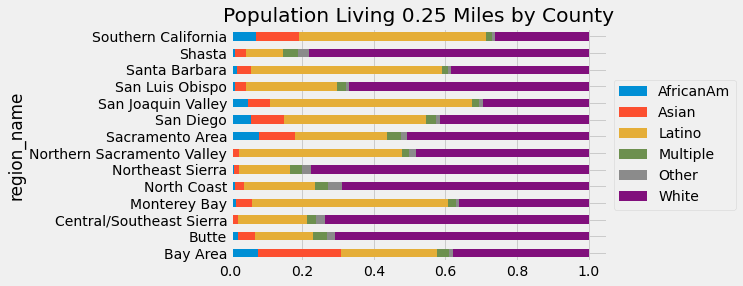

In [276]:
# Plot Racial/Ethnic Breakdown by County: Bar Graph
pct_by_county.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Living 0.25 Miles by County', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [60]:
### Population breakdown by region
df_county

,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90324,1,AIAN,RE,Bay Area,Bay Area,11644.0,20691.0,56.28,Other
90325,3,AfricanAm,RE,Bay Area,Bay Area,290643.0,460178.0,63.16,AfricanAm
90326,2,Asian,RE,Bay Area,Bay Area,901884.0,1645872.0,54.80,Asian
90327,4,Latino,RE,Bay Area,Bay Area,1035942.0,1681800.0,61.60,Latino
90328,7,Multiple,RE,Bay Area,Bay Area,129138.0,248268.0,52.02,Multiple
...,...,...,...,...,...,...,...,...,...
90444,4,Latino,RE,Southern California,Southern California,5082016.0,8169102.0,62.21,Latino
90445,7,Multiple,RE,Southern California,Southern California,181987.0,378200.0,48.12,Multiple
90446,5,NHOPI,RE,Southern California,Southern California,25455.0,43955.0,57.91,Other
90447,8,Other,RE,Southern California,Southern California,22985.0,40257.0,57.10,Other


In [62]:
## summarize by race_eth_updt to group small populations
grouped_multiple4 = df_county.groupby(['region_name','race_eth_updt']).agg({'tot_people': ['sum']})
grouped_multiple4.columns = ['people_tot_sum']
grouped_multiple4 = grouped_multiple4.reset_index()
grouped_multiple4

,region_name,race_eth_updt,people_tot_sum
0,Bay Area,AfricanAm,460178.0
1,Bay Area,Asian,1645872.0
2,Bay Area,Latino,1681800.0
3,Bay Area,Multiple,248268.0
4,Bay Area,Other,81718.0
...,...,...,...
79,Southern California,Asian,2164347.0
80,Southern California,Latino,8169102.0
81,Southern California,Multiple,378200.0
82,Southern California,Other,132799.0


In [65]:
# Calculate % of all living in region
# Calculate new pct_total
df_county_pct2 = ['pct_all'] = df_county_pct['people_tot_sum'] / df_county_pct['people_tot_sum']
df_county_pct2

NameError: name 'df_county_pct' is not defined

In [63]:
break_by_county = pd.pivot_table(grouped_multiple4, index = 'region_name', columns = 'race_eth_updt', values = 'people_tot_sum') 
print(break_by_county)

race_eth_updt               AfricanAm      Asian     Latino  Multiple  \
region_name                                                             
Bay Area                     460178.0  1645872.0  1681800.0  248268.0   
Butte                          3133.0     8921.0    31116.0    7300.0   
Central/Southeast Sierra       2680.0     2083.0    24496.0    4739.0   
Monterey Bay                  13959.0    35733.0   345281.0   17534.0   
North Coast                    4135.0     5982.0    49856.0   11545.0   
Northeast Sierra               3946.0     2198.0    22387.0    5926.0   
Northern Sacramento Valley      709.0     1566.0    36249.0    2378.0   
Sacramento Area              154259.0   268842.0   479036.0   91030.0   
San Diego                    146600.0   328058.0   991348.0   94943.0   
San Joaquin Valley           181592.0   279474.0  1930510.0   85696.0   
San Luis Obispo                5128.0     8106.0    55973.0    6237.0   
Santa Barbara                  7242.0    19591.0   

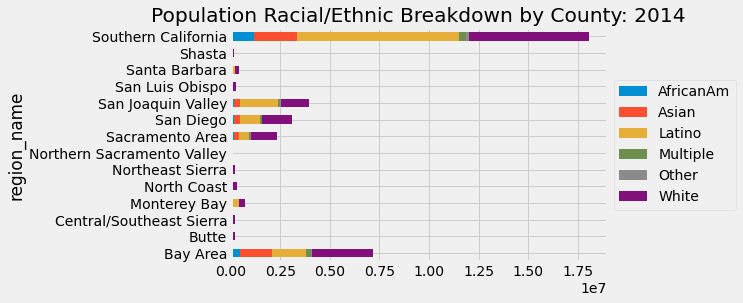

In [64]:
# Plot Racial/Ethnic Breakdown by County: Bar Graph
break_by_county.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Racial/Ethnic Breakdown by County: 2014', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Which races have the highest percentage of their population close to alcohol establishments?

In [48]:
df_state2 = df_state
df_state2['pct_of_tot'] = df_state2['pct_of_total']/100
df_state_pct2 = df_state2[['race_eth_name', 'num_people_qrt', 'tot_people', 'pct_of_total', 'pct_of_tot']]
df_state_pct2

,race_eth_name,num_people_qrt,tot_people,pct_of_total,pct_of_tot
90315,AIAN,64394.0,162250.0,39.69,0.3969
90316,AfricanAm,1197915.0,2163804.0,55.36,0.5536
90317,Asian,2410073.0,4775070.0,50.47,0.5047
90318,Latino,8100882.0,14013719.0,57.81,0.5781
90319,Multiple,439097.0,968696.0,45.33,0.4533
90320,NHOPI,65140.0,128577.0,50.66,0.5066
90321,Other,42855.0,85587.0,50.07,0.5007
90323,White,5917756.0,14956253.0,39.57,0.3957


In [53]:
df_state_pct3 = df_state_pct2.set_index('race_eth_name')
df_state_pct3['people_not_qrt'] = df_state_pct3['tot_people'] - df_state_pct3['num_people_qrt']
df_state_pct4 = df_state_pct3.drop(['pct_of_total', 'pct_of_tot', 'tot_people'], axis=1)
df_state_pct4

,num_people_qrt,people_not_qrt
race_eth_name,,
AIAN,64394.0,97856.0
AfricanAm,1197915.0,965889.0
Asian,2410073.0,2364997.0
Latino,8100882.0,5912837.0
Multiple,439097.0,529599.0
NHOPI,65140.0,63437.0
Other,42855.0,42732.0
White,5917756.0,9038497.0


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'num_people_qrt' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'people_not_qrt' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


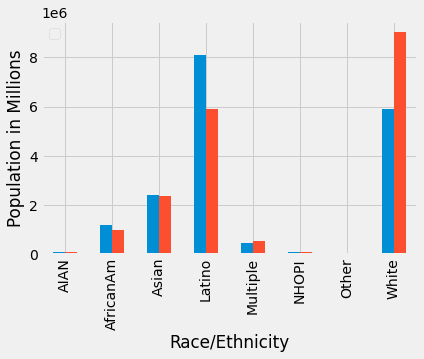

In [79]:
plt.style.use('fivethirtyeight')
df_state_pct4.plot( 
    kind = 'bar', 
    stacked = False, 
    title = '', 
    mark_right = True) 
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Population in Millions')
plt.xlabel('Race/Ethnicity')
plt.legend(['num_people_qrt', 'people_not_qrt'],['Population within 1/4 Mile', 'Population outside 1/4 Mile'])
